In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# Generate synthetic data with anomalies

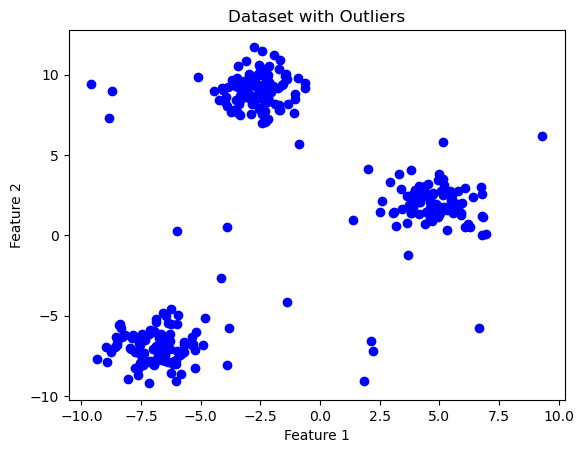

In [2]:
# Create a dataset with blobs (clusters)
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Add some anomalies (outliers)
rng = np.random.RandomState(42)
X_outliers = rng.uniform(low=-10, high=10, size=(20, X.shape[1]))
X_with_outliers = np.vstack([X, X_outliers])

# Convert to DataFrame for better visualization
df = pd.DataFrame(X_with_outliers, columns=['Feature 1', 'Feature 2'])

# Visualize the dataset
plt.scatter(df['Feature 1'], df['Feature 2'], color='blue', label='Data points')
plt.title('Dataset with Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Apply Isolation Forest for outlier detection

In [3]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Outlier'] = iso_forest.fit_predict(df[['Feature 1', 'Feature 2']])

# Marking outliers (-1 is outlier, 1 is inlier)
df['Outlier'] = df['Outlier'].map({1: 'Inlier', -1: 'Outlier'})

# Check the number of inliers and outliers
df['Outlier'].value_counts()

Outlier
Inlier     304
Outlier     16
Name: count, dtype: int64

#  Visualize the inliers and outliers

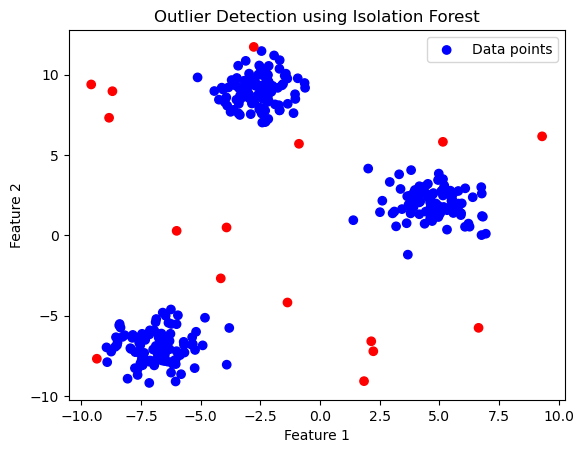

In [4]:
colors = {'Inlier': 'blue', 'Outlier': 'red'}

plt.scatter(df['Feature 1'], df['Feature 2'], 
            c=df['Outlier'].map(colors), label='Data points')
plt.title('Outlier Detection using Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()